In [1]:
import argparse

import pandas as pd
import numpy as np
import scipy
import re
import gensim
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/data_preprocessed.csv')

In [3]:
data['Title w2v'] = data['Title w2v'].apply(lambda s: [float(char) for char in s.strip('[]').replace('\n', '').split()])

In [4]:
nofired = data[data.Label == 0]
nofired = nofired['Title w2v'].values.flatten()
nofired = np.hstack(nofired).reshape(-1,300)
pca = PCA(n_components=2)
#principalComponents_nofired = pca.fit(nofired)
nofired_reduced = pca.fit_transform(nofired)
print(pca.explained_variance_ratio_)

[0.82524834 0.05935883]


In [5]:
fired = data[data.Label == 1]
fired = fired['Title w2v'].values.flatten()
fired = np.hstack(fired).reshape(-1,300)
fired_reduced = pca.fit_transform(fired)
print(pca.explained_variance_ratio_)

[0.76410562 0.07645206]


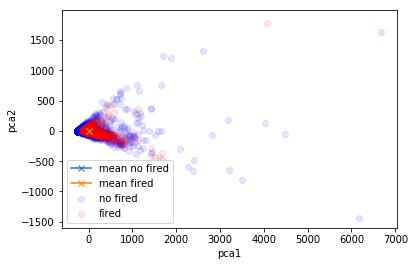

In [6]:
plt.scatter(nofired_reduced[:,0],nofired_reduced[:,1],color='blue',label='no fired',alpha=0.1)
plt.scatter(fired_reduced[:,0],fired_reduced[:,1],color='red',label='fired',alpha=0.1)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.plot(nofired_reduced.mean(0), marker="x",label='mean no fired')
plt.plot(fired_reduced.mean(0), marker="x",label='mean fired')
plt.legend()
plt.savefig('../images/representation_cluster')

In [7]:
from gensim import *

In [8]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)  

FileNotFoundError: [Errno 2] No such file or directory: 'data/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
fired_mean = fired.mean(0)

In [ ]:
word2vec_model.similar_by_vector(fired_mean, topn=10, restrict_vocab=None)

In [ ]:
nofired_mean = nofired.mean(0)
word2vec_model.similar_by_vector(nofired_mean, topn=10, restrict_vocab=None)

In [ ]:
diff = fired_mean - nofired_mean

In [ ]:
word2vec_model.similar_by_vector(diff, topn=10, restrict_vocab=None)